In [266]:
print("Hello this is working")

Hello this is working


In [2]:
import pandas as pd 
data = pd.read_csv('data.csv')

In [268]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

Features to change are :
- Sex (pd.dummies)
- Blood Pressure(2 new features)
- Diet 


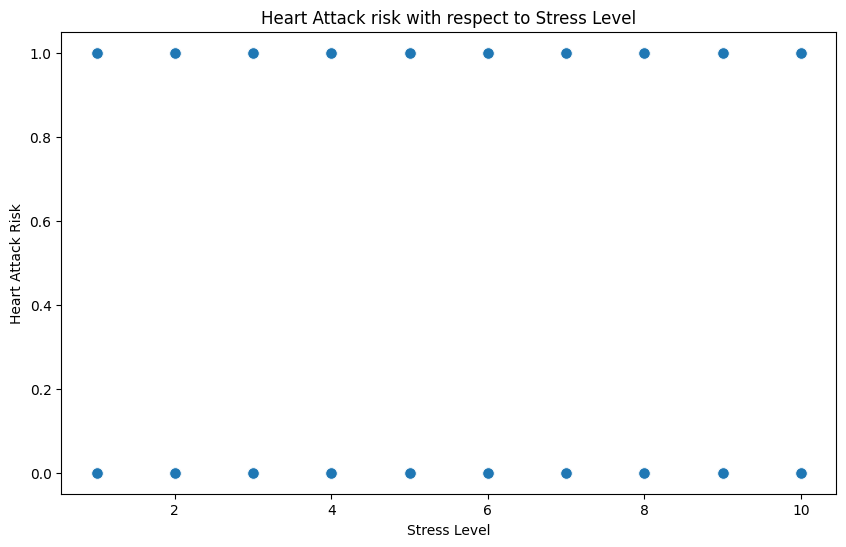

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(x='Stress Level', y = 'Heart Attack Risk',data = data,s = 70).set_title('Heart Attack risk with respect to Stress Level')
plt.show()

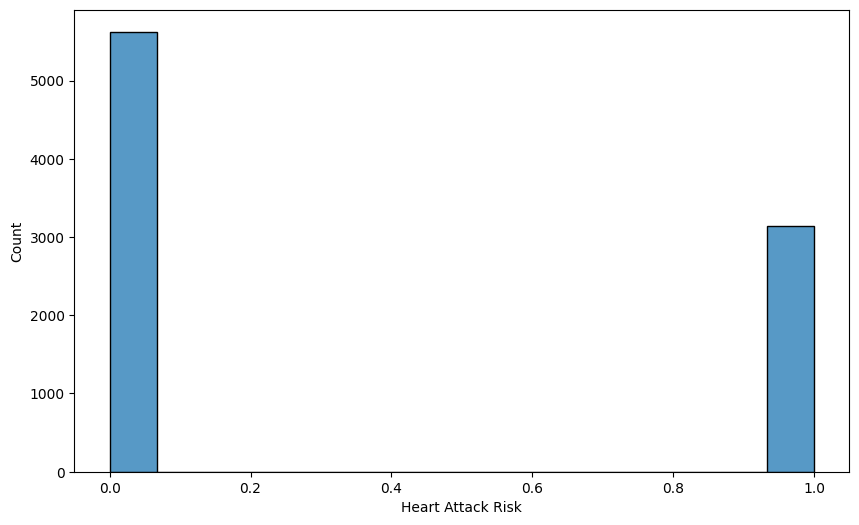

In [178]:
plt.figure(figsize=(10,6))
sns.histplot(data = data['Heart Attack Risk'])
plt.show()

In [8]:
data['StressLevel'] = data['StressLevel'].apply(lambda x: 0 if x <5 else 1)

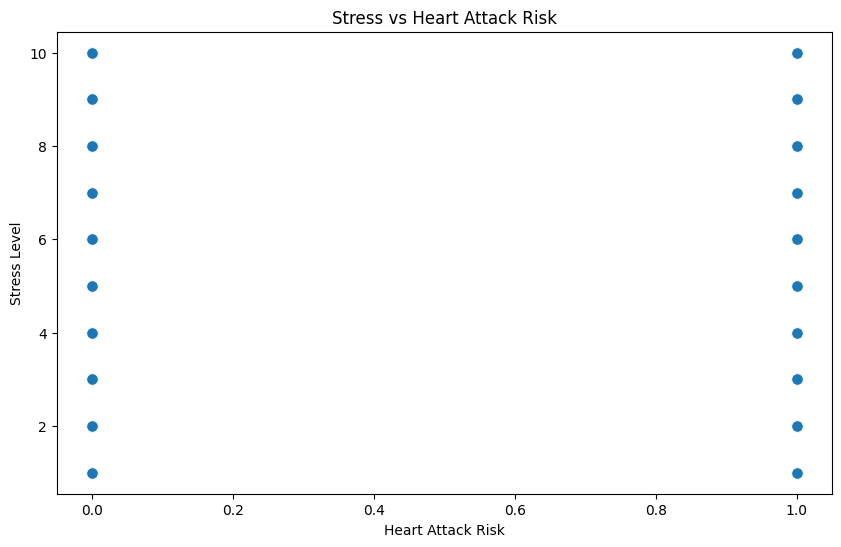

In [180]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Heart Attack Risk', y = 'Stress Level',  data = data, s = 70).set_title('Stress vs Heart Attack Risk')
plt.show()

In [181]:
print(data['Sex'].value_counts())
print(data['Heart Attack Risk'].value_counts())

Sex
Male      6111
Female    2652
Name: count, dtype: int64
Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64


In [182]:
female_heart_attack = len(data[(data['Sex'] == 'Female') & (data['Heart Attack Risk'] == 1)])
male_heart_attack = len(data[(data['Sex']== 'Male')& (data['Heart Attack Risk'] == 1)])

print(female_heart_attack, male_heart_attack)

944 2195


As we can see 944 out of the 2652 females had a Heart Attack Risk and 2195 out of the 6111 males had an Heart Attack Risk
Percentage : 
- Female = 35.6%
- Male = 35.9% 

Now let us calculate the percentage of deaths caused by heart attack for both the genders

In [183]:
stress_attack_female = len(data[(data['Sex'] == 'Female') & (data['Stress Level'] == 1) & (data['Heart Attack Risk'] == 1 )])
stress_attack_male = len(data[(data['Sex'] == 'Male') & (data['Stress Level'] == 1) & (data['Heart Attack Risk'] == 1 )])

print(stress_attack_female, stress_attack_male)

89 214


So out of the 944 females who had a high risk of heart attack 567 of them had high stress levels on the other hand
1309 males out of the 2195 had a high risk of heart attack

Percentage :
- Female = 60%
- Male = 59.6%

As we can see more than half of the people who had high risk of Heart Attack also had a high level of Stress 
This shows a relation between the two, but there are still some confounding factors which prevent us from 
learning the true effect of stress level on heart attack risk.

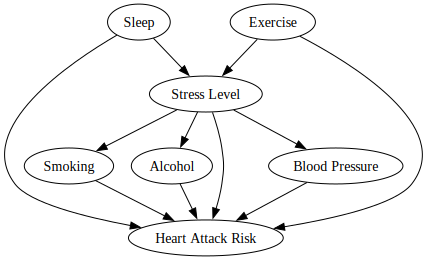

In [184]:
import graphviz as gr 

g = gr.Digraph()

g.edge('Stress Level', 'Heart Attack Risk')
g.edge('Sleep','Stress Level')
g.edge('Stress Level', 'Blood Pressure')
g.edge('Blood Pressure','Heart Attack Risk')
g.edge('Sleep','Heart Attack Risk')
g.edge('Exercise','Stress Level')
g.edge('Exercise','Heart Attack Risk')
g.edge('Stress Level','Smoking')
g.edge('Smoking','Heart Attack Risk')
g.edge('Stress Level','Alcohol')
g.edge('Alcohol','Heart Attack Risk')
g

This is how the Graphical Causal Model would look like. There are a lot of Unseen features affecting 
stress level like work or family problems which cannot be calculated. 

As we can see there are two confounders : Sleep and Exercise 
- In medical research it is proven that a good sleep cycle reduces stress as well as the risk to heart attack 
- A person who exercises frequently has low risk of heart attack along with low stress levels

As for the mediators : Alcohol, Smoking and Blood Pressure 
- People tend to drink more Alcohol when they are stressed which leads to Heart attack and the same 
goes for smoking 
- It is clinically observed that as the stress level increases the blood pressure of the person also 
increases and it is known that high blood pressure is one of the main reason for heart attack.

--------------------------------------------------------------------------------------------------------------------------------------------
## First we would calculate the total effect of Stress Level on Heart Attack Risk 
That means only controlling on the confounders to close the backdoor path.

In [185]:
data.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [4]:
data.rename(columns = {
    'Heart Attack Risk' : 'HeartAttackRisk',
    'Stress Level' : 'StressLevel',
    'Sleep Hours Per Day' : 'Sleep',
    'Exercise Hours Per Week': 'Activity',
}, inplace = True)

In [5]:
data.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Activity', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'StressLevel', 'Sedentary Hours Per Day', 'Income',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep',
       'Country', 'Continent', 'Hemisphere', 'HeartAttackRisk'],
      dtype='object')

In [6]:
data.drop(['Continent','Hemisphere','Country','Diet','Patient ID'], axis = 1, inplace = True)
data['Sex'] = pd.Categorical(data['Sex']).codes

bp = data['Blood Pressure'] 

systolic = []
diastolic = []
for reading in bp:
    sys, dia = str.split(reading , sep= '/')
    systolic.append(sys)
    diastolic.append(dia)
    
data['systolic'] = systolic
data['diastolic'] = diastolic

data.drop('Blood Pressure', axis = 1, inplace = True)


In [7]:
data['systolic'] = data['systolic'].astype(int)
data['diastolic'] = data['diastolic'].astype(int)

In [275]:
data.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Activity,...,StressLevel,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep,HeartAttackRisk,systolic,diastolic
0,67,1,208,72,0,0,1,0,0,4.168189,...,1,6.615001,261404,31.251233,286,0,6,0,158,88
1,21,1,389,98,1,1,1,1,1,1.813242,...,0,4.963459,285768,27.194973,235,1,7,0,165,93
2,21,0,324,72,1,0,0,0,0,2.078353,...,1,9.463426,235282,28.176571,587,4,4,0,174,99
3,84,1,383,73,1,1,1,0,1,9.828130,...,1,7.648981,125640,36.464704,378,3,4,0,163,100
4,66,1,318,93,1,1,1,1,0,5.804299,...,1,1.514821,160555,21.809144,231,1,5,0,91,88


In [203]:
data['Sex']

0       1
1       1
2       0
3       1
4       1
       ..
8758    1
8759    0
8760    1
8761    1
8762    0
Name: Sex, Length: 8763, dtype: int8

In [276]:
import statsmodels.formula.api as smf 

model = smf.ols('HeartAttackRisk ~ StressLevel + Sleep + Activity', data = data).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.3773,0.022,17.326,0.000,0.335,0.420
StressLevel,0.0050,0.010,0.480,0.632,-0.015,0.025
Sleep,-0.0045,0.003,-1.728,0.084,-0.010,0.001
Activity,0.0009,0.001,1.043,0.297,-0.001,0.003


In [205]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

x = data.drop('StressLevel', axis = 1)
y = data['StressLevel']
sm = SMOTE(random_state = 42)
x_smote, y_smote = sm.fit_resample(x,y)

rus = RandomUnderSampler(random_state = 42)
x_rus , y_rus = rus.fit_resample(x,y)

In [207]:
data_smote = pd.concat([x_smote,y_smote])

In [208]:
data_rus = pd.concat([x_rus, y_rus])

In [222]:
import numpy as np
treat_units = np.sum(y_smote == 1)
control_units = np.sum(y_smote == 0)

print(treat_units , control_units)

5207 5207


In [278]:
data.dropna(axis = 1, inplace = True)

In [279]:
data['StressLevel'].unique()

array([1, 0])

In [280]:
print(data['StressLevel'].sample(10))

8375    1
673     1
7091    1
5994    0
5363    1
5654    0
7121    1
2587    0
3432    0
3681    1
Name: StressLevel, dtype: int64


In [281]:
print(data['StressLevel'].isnull().sum())

0


In [210]:
data.columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Activity',
       'Previous Heart Problems', 'Medication Use', 'StressLevel',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep', 'HeartAttackRisk',
       'systolic', 'diastolic'],
      dtype='object')

In [316]:
from causalinference import CausalModel

cm = CausalModel(
    Y = data_smote['HeartAttackRisk'].values,
    D = data_smote['StressLevel'].values,
    X = data_smote[['Activity','Sleep','systolic','diastolic','Alcohol Consumption','Smoking']].values
)
cm.est_via_matching()
print(cm.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.061      0.015      4.012      0.000      0.031      0.091
           ATC      0.072      0.017      4.119      0.000      0.038      0.106
           ATT      0.051      0.017      3.006      0.003      0.018      0.084



In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int8   
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Activity                         8763 non-null   float64
 10  Previous Heart Problems          8763 non-null   int64  
 11  Medication Use                   8763 non-null   int64  
 12  StressLevel         

In [231]:
inf_check = data_smote['StressLevel'].apply(lambda x: x == float('inf') or x == float('-inf'))

data_smote[inf_check]

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Activity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep,HeartAttackRisk,systolic,diastolic,StressLevel


In [282]:
data['StressLevel'].dtype

dtype('int64')

In [246]:
data_smote.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Activity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep,HeartAttackRisk,systolic,diastolic,StressLevel
0,67.0,1.0,208.0,72.0,0.0,0.0,1.0,0.0,0.0,4.168189,...,6.615001,261404.0,31.251233,286.0,0.0,6.0,0.0,158.0,88.0,NaN
1,21.0,1.0,389.0,98.0,1.0,1.0,1.0,1.0,1.0,1.813242,...,4.963459,285768.0,27.194973,235.0,1.0,7.0,0.0,165.0,93.0,NaN
2,21.0,0.0,324.0,72.0,1.0,0.0,0.0,0.0,0.0,2.078353,...,9.463426,235282.0,28.176571,587.0,4.0,4.0,0.0,174.0,99.0,NaN
3,84.0,1.0,383.0,73.0,1.0,1.0,1.0,0.0,1.0,9.828130,...,7.648981,125640.0,36.464704,378.0,3.0,4.0,0.0,163.0,100.0,NaN
4,66.0,1.0,318.0,93.0,1.0,1.0,1.0,1.0,0.0,5.804299,...,1.514821,160555.0,21.809144,231.0,1.0,5.0,0.0,91.0,88.0,NaN


In [247]:
data_rus.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Activity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep,HeartAttackRisk,systolic,diastolic,StressLevel
1,21.0,1.0,389.0,98.0,1.0,1.0,1.0,1.0,1.0,1.813242,...,4.963459,285768.0,27.194973,235.0,1.0,7.0,0.0,165.0,93.0,NaN
5,54.0,0.0,297.0,48.0,1.0,1.0,1.0,0.0,1.0,0.625008,...,7.798752,241339.0,20.146840,795.0,5.0,10.0,1.0,172.0,86.0,NaN
7,84.0,1.0,220.0,107.0,0.0,0.0,1.0,1.0,1.0,3.427929,...,10.543780,122093.0,22.221862,370.0,6.0,7.0,1.0,131.0,68.0,NaN
9,43.0,0.0,248.0,55.0,0.0,1.0,1.0,1.0,1.0,0.194515,...,4.055115,209703.0,22.558917,232.0,7.0,7.0,0.0,160.0,70.0,NaN
11,71.0,1.0,374.0,70.0,1.0,1.0,1.0,1.0,1.0,8.251995,...,7.227338,163066.0,32.485345,523.0,4.0,8.0,0.0,158.0,71.0,NaN


In [248]:
data.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Activity,...,StressLevel,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep,HeartAttackRisk,systolic,diastolic
0,67,1,208,72,0,0,1,0,0,4.168189,...,1,6.615001,261404,31.251233,286,0,6,0,158,88
1,21,1,389,98,1,1,1,1,1,1.813242,...,0,4.963459,285768,27.194973,235,1,7,0,165,93
2,21,0,324,72,1,0,0,0,0,2.078353,...,1,9.463426,235282,28.176571,587,4,4,0,174,99
3,84,1,383,73,1,1,1,0,1,9.828130,...,1,7.648981,125640,36.464704,378,3,4,0,163,100
4,66,1,318,93,1,1,1,1,0,5.804299,...,1,1.514821,160555,21.809144,231,1,5,0,91,88


In [293]:
from sklearn.preprocessing import StandardScaler
treatment = data['StressLevel']
outcome = data['HeartAttackRisk']
features = data.drop(['StressLevel', 'HeartAttackRisk'], axis = 1)
sc = StandardScaler()
data_scaled = sc.fit_transform(features)

In [294]:
column_names = features.columns

In [295]:
data_scaled = pd.DataFrame(data_scaled)

In [296]:
data_scaled.columns = column_names

In [297]:
data_scaled.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Activity,Previous Heart Problems,Medication Use,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep,systolic,diastolic
0,0.625557,0.658765,-0.641579,-0.147042,-1.369651,-0.986061,0.339157,-1.002857,-1.219867,-1.010838,-0.991704,-0.996696,0.179251,1.280130,0.373454,-0.588539,-1.528843,-0.514750,0.870044,0.193782
1,-1.539322,0.658765,1.596895,1.118179,0.730113,1.014136,0.339157,0.997151,0.819762,-1.418027,1.008365,-0.996696,-0.297225,1.582523,-0.268479,-0.816487,-1.090738,-0.011823,1.135714,0.534480
2,-1.539322,-1.517992,0.793023,-0.147042,0.730113,-0.986061,-2.948488,-1.002857,-1.219867,-1.372188,1.008365,1.003315,1.001031,0.955917,-0.113134,0.756800,0.223577,-1.520604,1.477290,0.943319
3,1.425621,0.658765,1.522691,-0.098380,0.730113,1.014136,0.339157,-1.002857,0.819762,-0.032188,1.008365,-0.996696,0.477557,-0.404902,1.198524,-0.177339,-0.214528,-1.520604,1.059809,1.011458
4,0.578495,0.658765,0.718820,0.874867,0.730113,1.014136,0.339157,0.997151,-1.219867,-0.727941,1.008365,-0.996696,-1.292170,0.028445,-1.120826,-0.834365,-1.090738,-1.017677,-1.672797,0.193782


In [299]:
data_scaled = pd.concat([data_scaled, outcome], axis =1 )

In [300]:
data_scaled.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Activity,...,Medication Use,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep,systolic,diastolic,HeartAttackRisk
0,0.625557,0.658765,-0.641579,-0.147042,-1.369651,-0.986061,0.339157,-1.002857,-1.219867,-1.010838,...,-0.996696,0.179251,1.280130,0.373454,-0.588539,-1.528843,-0.514750,0.870044,0.193782,0
1,-1.539322,0.658765,1.596895,1.118179,0.730113,1.014136,0.339157,0.997151,0.819762,-1.418027,...,-0.996696,-0.297225,1.582523,-0.268479,-0.816487,-1.090738,-0.011823,1.135714,0.534480,0
2,-1.539322,-1.517992,0.793023,-0.147042,0.730113,-0.986061,-2.948488,-1.002857,-1.219867,-1.372188,...,1.003315,1.001031,0.955917,-0.113134,0.756800,0.223577,-1.520604,1.477290,0.943319,0
3,1.425621,0.658765,1.522691,-0.098380,0.730113,1.014136,0.339157,-1.002857,0.819762,-0.032188,...,-0.996696,0.477557,-0.404902,1.198524,-0.177339,-0.214528,-1.520604,1.059809,1.011458,0
4,0.578495,0.658765,0.718820,0.874867,0.730113,1.014136,0.339157,0.997151,-1.219867,-0.727941,...,-0.996696,-1.292170,0.028445,-1.120826,-0.834365,-1.090738,-1.017677,-1.672797,0.193782,0


In [301]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

x = data_scaled
y = treatment
sm = SMOTE(random_state = 42)
x_smote, y_smote = sm.fit_resample(x,y)

rus = RandomUnderSampler(random_state = 42)
x_rus , y_rus = rus.fit_resample(x,y)

In [304]:
data_smote = pd.concat([x_smote,y_smote], axis = 1)

In [305]:
data_smote.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Activity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep,systolic,diastolic,HeartAttackRisk,StressLevel
0,0.625557,0.658765,-0.641579,-0.147042,-1.369651,-0.986061,0.339157,-1.002857,-1.219867,-1.010838,...,0.179251,1.280130,0.373454,-0.588539,-1.528843,-0.514750,0.870044,0.193782,0,1
1,-1.539322,0.658765,1.596895,1.118179,0.730113,1.014136,0.339157,0.997151,0.819762,-1.418027,...,-0.297225,1.582523,-0.268479,-0.816487,-1.090738,-0.011823,1.135714,0.534480,0,0
2,-1.539322,-1.517992,0.793023,-0.147042,0.730113,-0.986061,-2.948488,-1.002857,-1.219867,-1.372188,...,1.001031,0.955917,-0.113134,0.756800,0.223577,-1.520604,1.477290,0.943319,0,1
3,1.425621,0.658765,1.522691,-0.098380,0.730113,1.014136,0.339157,-1.002857,0.819762,-0.032188,...,0.477557,-0.404902,1.198524,-0.177339,-0.214528,-1.520604,1.059809,1.011458,0,1
4,0.578495,0.658765,0.718820,0.874867,0.730113,1.014136,0.339157,0.997151,-1.219867,-0.727941,...,-1.292170,0.028445,-1.120826,-0.834365,-1.090738,-1.017677,-1.672797,0.193782,0,1


In [321]:
x_rus.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Activity,...,Medication Use,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep,systolic,diastolic,HeartAttackRisk
1,-1.539322,0.658765,1.596895,1.118179,0.730113,1.014136,0.339157,0.997151,0.819762,-1.418027,...,-0.996696,-0.297225,1.582523,-0.268479,-0.816487,-1.090738,-0.011823,1.135714,0.534480,0
5,0.013743,-1.517992,0.459107,-1.314938,0.730113,1.014136,0.339157,-1.002857,0.819762,-1.623483,...,1.003315,0.520767,1.031094,-1.383898,1.686470,0.661682,1.496959,1.401384,0.057502,1
7,1.425621,0.658765,-0.493172,1.556140,-1.369651,-0.986061,0.339157,0.997151,0.819762,-1.138835,...,1.003315,1.312717,-0.448925,-1.055511,-0.213096,1.099787,-0.011823,-0.154683,-1.169013,1
9,-0.503945,-1.517992,-0.146889,-0.974302,-1.369651,1.014136,0.339157,0.997151,0.819762,-1.697919,...,-0.996696,-0.559286,0.638444,-1.002169,-0.829896,1.537893,-0.011823,0.945950,-1.032733,0
11,0.813808,0.658765,1.411386,-0.244367,0.730113,1.014136,0.339157,0.997151,0.819762,-0.304714,...,-0.996696,0.355912,0.059610,0.568761,0.470748,0.223577,0.491104,0.870044,-0.964593,0


In [320]:
data_rus = pd.DataFrame(x_rus)
data_rus = pd.concat([data_rus, y_rus], axis = 1)

In [322]:
data_rus.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Activity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep,systolic,diastolic,HeartAttackRisk,StressLevel
1,-1.539322,0.658765,1.596895,1.118179,0.730113,1.014136,0.339157,0.997151,0.819762,-1.418027,...,-0.297225,1.582523,-0.268479,-0.816487,-1.090738,-0.011823,1.135714,0.534480,0,0
5,0.013743,-1.517992,0.459107,-1.314938,0.730113,1.014136,0.339157,-1.002857,0.819762,-1.623483,...,0.520767,1.031094,-1.383898,1.686470,0.661682,1.496959,1.401384,0.057502,1,0
7,1.425621,0.658765,-0.493172,1.556140,-1.369651,-0.986061,0.339157,0.997151,0.819762,-1.138835,...,1.312717,-0.448925,-1.055511,-0.213096,1.099787,-0.011823,-0.154683,-1.169013,1,0
9,-0.503945,-1.517992,-0.146889,-0.974302,-1.369651,1.014136,0.339157,0.997151,0.819762,-1.697919,...,-0.559286,0.638444,-1.002169,-0.829896,1.537893,-0.011823,0.945950,-1.032733,0,0
11,0.813808,0.658765,1.411386,-0.244367,0.730113,1.014136,0.339157,0.997151,0.819762,-0.304714,...,0.355912,0.059610,0.568761,0.470748,0.223577,0.491104,0.870044,-0.964593,0,0


In [324]:
from causalinference import CausalModel

cm = CausalModel(
    Y = data_rus['HeartAttackRisk'].values,
    D = data_rus['StressLevel'].values,
    X = data_rus[['Activity','Sleep','systolic','diastolic','Alcohol Consumption','Smoking']].values
)
cm.est_via_ols()
print(cm.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.007      0.011      0.589      0.556     -0.016      0.029
           ATC      0.006      0.011      0.535      0.593     -0.016      0.028
           ATT      0.007      0.011      0.643      0.520     -0.015      0.030



In [327]:
data.iloc[0]

Age                                    67.000000
Sex                                     1.000000
Cholesterol                           208.000000
Heart Rate                             72.000000
Diabetes                                0.000000
Family History                          0.000000
Smoking                                 1.000000
Obesity                                 0.000000
Alcohol Consumption                     0.000000
Activity                                4.168189
Previous Heart Problems                 0.000000
Medication Use                          0.000000
StressLevel                             1.000000
Sedentary Hours Per Day                 6.615001
Income                             261404.000000
BMI                                    31.251233
Triglycerides                         286.000000
Physical Activity Days Per Week         0.000000
Sleep                                   6.000000
HeartAttackRisk                         0.000000
systolic            